In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
# Funciones
def draw(vertices, edges, im):
#Dibuja objeto definido por vertices y bordes
    # Normalizar coordenadas homogeneas
    v_h = np.array([ v[:-2]/v[-1] for v in vertices])
    for e in edges:
        cv.line(im, tuple(v_h[e[0]].astype(int)), tuple(v_h[e[1]].astype(int)), (255,0,15), 2)
    for v in v_h:
        cv.circle(im, tuple(v.astype(int)), 3, (255,0,255),-1)

In [ ]:
### ---------- DEFINIR FUNCIONES ---------- ###
def translate3d(vertex, dx, dy, dz):
  tresd = np.array([[1,0,0,dx],[0,1,0,dy],[0,0,1,dz],[0,0,0,1]])
  v = tresd @ vertex.T
  return v.T

In [ ]:
#Operación de traslación 3d
def project2D(vertex, f=35):
#Aplica una transformacion de proyeccion pinhole
  projt = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,(1/f),1]])
  v1 = projt @ vertex.T
  return v1.T

In [ ]:
### ---------- DEFINIT GEOMETRIA  ---------- ###
# Cubo definido en su sistema coordenado
# Lista de vertices [[x, y, z,1], ...
# List de bordes que relacionan los indices de los vertices
# [(0,1), (1,2), ....

v = np.array([[0,100,100,1],[0,100,0,1],[100,100,0,1],[100,0,0,1],[100,0,100,1],[0,0,100,1],[0,0,0,1],[100,100,100,1]])
edges = [(0,1),(1,2),(2,3),(3,4),(4,5),(5,0),(5,6),(1,6),(6,3),(7,4),(0,7),(7,2)]

In [ ]:
### ---------- TRASLADAR CUBO A POSICION INDICADA ---------- ###
# Parametros camara
f = 200   # Distancia focal

# Tamano imagen
w = 500
h = 500

In [ ]:
### ---------- PROYECTAR VERTICES ---------- ###
# Proyectar 3D -> 2D
vp = translate3d(v,100,200,50)
vt = project2D(vp,f)

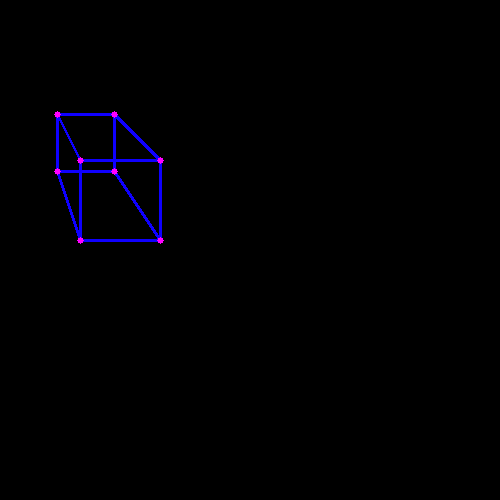

In [ ]:
###----------  TRASLADAR PROYECCION A CENTRO DE IMAGEN ---------- ###

# Dibujar y mostrar
im = np.zeros((h,w,3), np.uint8)
draw(vt, edges, im)
cv2_imshow(im)
